## Importação dos Dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/dataset-1000-com-preco-promocional-e-renovacao-estoque.csv')

In [3]:
df.head()

,ID_PRODUTO,DATA_EVENTO,PRECO,FLAG_PROMOCAO,QUANTIDADE_ESTOQUE
0,1000,2023-12-31,138.43,1,100
1,1001,2023-12-31,75.08,0,100
2,1002,2023-12-31,58.84,0,100
3,1003,2023-12-31,61.96,0,100
4,1004,2023-12-31,20.34,0,100


## Tratamento de Dados

In [4]:
# Converter 'DATA_EVENTO' para o formato datetime e extrair características úteis
df['DATA_EVENTO'] = pd.to_datetime(df['DATA_EVENTO'])
df['year'] = df['DATA_EVENTO'].dt.year
df['month'] = df['DATA_EVENTO'].dt.month
df['day'] = df['DATA_EVENTO'].dt.day
df['day_of_week'] = df['DATA_EVENTO'].dt.dayofweek

# Remover a coluna original 'DATA_EVENTO'
df = df.drop(columns=['DATA_EVENTO'])

In [5]:
# Verificar dados faltantes após o tratamento
print("Dados faltantes por coluna após o tratamento:")
print(df.isnull().sum())

Dados faltantes por coluna após o tratamento:
ID_PRODUTO            0
PRECO                 0
FLAG_PROMOCAO         0
QUANTIDADE_ESTOQUE    0
year                  0
month                 0
day                   0
day_of_week           0
dtype: int64


## Treinamento do Modelo

In [6]:
# Definir as features (X) e o target (y)
X = df.drop(columns=['QUANTIDADE_ESTOQUE', 'ID_PRODUTO'])
y = df['QUANTIDADE_ESTOQUE']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [7]:
# Inicializar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Resultados

In [8]:
# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print(f"Erro Médio Absoluto (MAE): {round(mae, 4)}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {round(rmse, 4)}")
print(f"Acurácia (R^2): {round(r2, 3)}%")

Erro Médio Absoluto (MAE): 24.9419
Raiz do Erro Quadrático Médio (RMSE): 29.2673
Acurácia (R^2): 0.072%


In [9]:
# Opcional: exibir algumas previsões em comparação com os valores reais
comparacao = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(comparacao.head())

     Real   Previsto
521    33  48.826332
737    62  50.826503
740    28  55.644461
660    59  54.367475
411    15  53.600889


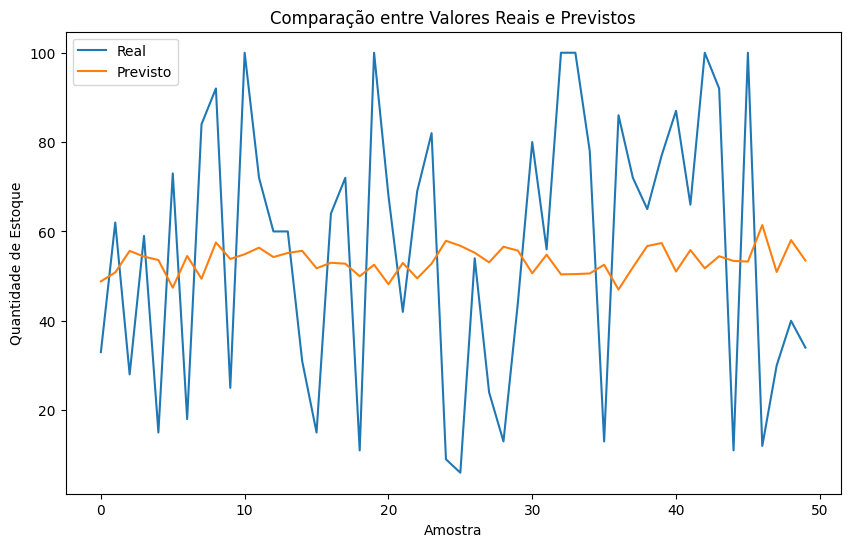

In [10]:
# Plotar um gráfico com algumas previsões
plt.figure(figsize=(10, 6))
plt.plot(comparacao['Real'].values[:50], label='Real')
plt.plot(comparacao['Previsto'].values[:50], label='Previsto')
plt.legend()
plt.xlabel('Amostra')
plt.ylabel('Quantidade de Estoque')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()

# Conclusão
---
O modelo de regressão linear foi treinado para prever a quantidade de estoque. Aqui estão os resultados da avaliação do modelo:

* Erro Médio Absoluto (MAE): 24.9419
* Raiz do Erro Quadrático Médio (RMSE): 29.2673

Estes valores indicam o erro médio nas previsões do modelo em relação aos valores reais de quantidade de estoque. Embora o modelo apresente erros, é possível que com a inclusão de mais dados ou a utilização de modelos mais complexos (como árvores de decisão, florestas aleatórias ou redes neurais) o desempenho possa ser melhorado.